In [12]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/06_sphere_brush/py_files')

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

from math import pi
from create_in import create_in
from free_energy import free_energy

In [13]:
r_sphere = 10
N = 200
chi_surf = -0.55
chi = 0.5
alpha = 0.5
Cs_values = 0.001
S = 70
N_layers = N - 110

In [14]:
file_name_pro = create_in(
    template_shpere = '/home/tpopova/prj/PB_SCF/06_sphere_brush/scf_templates/sphere.in',
    
    #название параметра
    range_param = 'none',
    min_val = 0.1,
    max_val = 0.1,
    
    r_sphere = r_sphere,
    Cs = Cs_values,
    chi = chi,
    chi_surf = chi_surf,
    
    N_layers = N_layers,
    N = N,
    
    S = S,
    alpha = alpha)

Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.216856e+00 |g| = 2.164759e+00 alpha = 1.000000e+00 
hessian scaling: 1.84399
it =  1  E = 1.004451e+00 |g| = 1.622487e+00 alpha = 1.461945e-01 
it =  2  E = 6.784257e-01 |g| = 1.534606e+00 alpha = 2.807394e-01 
it =  3  E = 1.202241e+00 |g| = 1.396833e+00 alpha = 7.526620e-02 
it =  4  E = 9.737727e-01 |g| = 1.281280e+00 alpha = 9.788314e-02 
it =  5  E = 9.392647e-01 |g| = 1.182876e+00 alpha = 9.078889e-02 
it =  6  E = 9.062931e-01 |g| = 1.097002e+00 alpha = 8.489923e-02 
it =  7  E = 8.705989e-01 |g| = 1.020802e+00 alpha = 8.067642e-02 
it =  8  E = 8.342582e-01 |g| = 9.524525e-01 alpha = 7.750719e-02 
it =  9  E = 7.988578e-01 |g| = 8.907402e-01 alpha = 7.496543e-02 
it =  10  E = 7.655005e-01 |g| = 8.348297e-01

In [15]:
phb_range = np.linspace(4.3, 5, num = 6)

f_ion_SCF_quen_values = []
Q_SCF_quen_values = []
dph_values = []

for ph in phb_range:
    
    psi, phi_brush, phi_end, f_ion_SCF_quen, Q_SCF_quen, pH_iep_in_quen, d_pH_b = free_energy(
        PK_MINUS=5.0,
        PK_PLUS=4.0,
        f_plus=0.5,
        pH_B=ph,
        file_names=file_name_pro
    )
    f_ion_SCF_quen_values.append(f_ion_SCF_quen)
    Q_SCF_quen_values.append(Q_SCF_quen)
    dph_values.append(d_pH_b)

<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2289968/187622328.py:8: SyntaxWarning: invalid escape sequence '\d'
  axs[0].plot(f_ion_SCF_quen_values[i], label=f'$\delta pH_B = {round(ph, 1)}$', color=cmap[i], linewidth=2)
/tmp/ipykernel_2289968/187622328.py:11: SyntaxWarning: invalid escape sequence '\D'
  axs[0].set_ylabel('$\Delta F_{{ion}}(z)$', fontsize=16)
/tmp/ipykernel_2289968/187622328.py:19: SyntaxWarning: invalid escape sequence '\d'
  axs[1].plot(Q_SCF_quen_values[i], label=f'$\delta pH_B = {round(ph, 1)}$', color=cmap[i], linewidth=2)


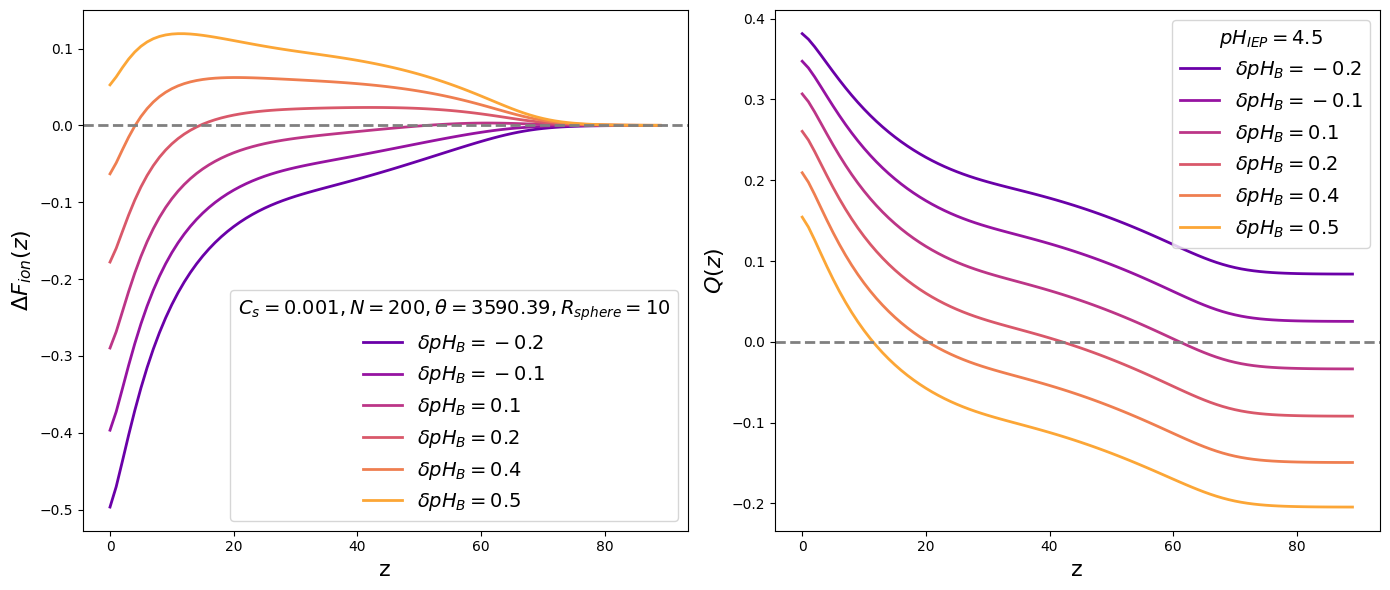

In [ ]:
cmap = cm.plasma(np.linspace(0.2, 0.8, len(phb_range)))

# Создаем два подграфика (side by side)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# График f_ion_SCF_quen
for i, ph in enumerate(dph_values):
    axs[0].plot(f_ion_SCF_quen_values[i], label=f'$\delta pH_B = {round(ph, 1)}$', color=cmap[i], linewidth=2)
axs[0].axhline(y=0, color='gray', linestyle='--', linewidth=2)
axs[0].set_xlabel('z', fontsize=16)
axs[0].set_ylabel('$\Delta F_{{ion}}(z)$', fontsize=16)
axs[0].legend(title=f'$C_s = {Cs_values}, N = {N}, \\theta = {round(4 * np.pi * r_sphere**2 * N/S, 2)}, R_{{sphere}} = {r_sphere}$',
              loc='lower right',
              fontsize=14,
              title_fontsize = 14)

# График Q_SCF_quen
for i, ph in enumerate(dph_values):
    axs[1].plot(Q_SCF_quen_values[i], label=f'$\delta pH_B = {round(ph, 1)}$', color=cmap[i], linewidth=2)
axs[1].axhline(y=0, color='gray', linestyle='--', linewidth=2)

axs[1].set_xlabel('z', fontsize=16)
axs[1].set_ylabel('$Q(z)$', fontsize=16)

axs[1].legend(title=f'$pH_{{IEP}} = {round(pH_iep_in_quen, 1)}$',
              loc='upper right',
              fontsize=14,
              title_fontsize = 14)

# Показать графики
plt.tight_layout()
# plt.savefig('sphere_var_pH_F_ion_Q.pdf', dpi=300, bbox_inches='tight')
plt.show()